In [ ]:
pip install anndata

In [ ]:
pip install scanpy

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/ya.yaghooti@gmail.com')

In [ ]:
adata = sc.read('/ya.yaghooti@gmail.com/MyDrive/F1L_compbio_internship/outs/240701_kinker_anndata_preprocessed.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 49707 × 22939
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_outlier', 'n_counts', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_tot

In [ ]:
adata.layers['counts'] = adata.X.copy()
#normalization
sc.pp.normalize_total(adata, target_sum=1e4)
#scaling
sc.pp.log1p(adata)
#run with TPU
#adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [ ]:
#Explanation for the choice of genes:
#ERBB3 (HER3), EGFR, and SHC2 form heterocomplexes with ERBB2 (HER2) when HER ligands bind HER2

#ADAM17 is a protease that produces HER ligands when activated and its overexpression shows high ligand production

#PTEN is an inhibitor of the PI3K/AKT pathway. This pathway is activated by HER2 and this leads to cell proliferation and metastasis.
#PTEN overexpression might be due to negative feedback in response to PI3K/AKT activation.

#HSP90AA1 activation leads to Trastuzumab resistance and overexpression means the cell line might not response to Trastuzumab.

#AKT1 and AKT2 are isoforms of the AKT gene. AKT2 becomes upregulated in some cancers including breast cancer and colorectal cancer.

#BCL2L11, CDKN1A, ATG4B, and LPL are genes transcribed in respons to FOXO activation, which becomes deactivated in response to PI3K/AKT activation

genes=['ERBB2', 'ERBB3', 'EGFR', 'ADAM17', 'PTEN', "HSP90AA1", "SHC2", "PIK3CA", "AKT1", "AKT2", "BCL2L11", "CDKN1A", "ATG4B", "LPL"]
df = sc.get.obs_df(adata, keys=genes)
df['Indication'] = adata.obs['Indication']

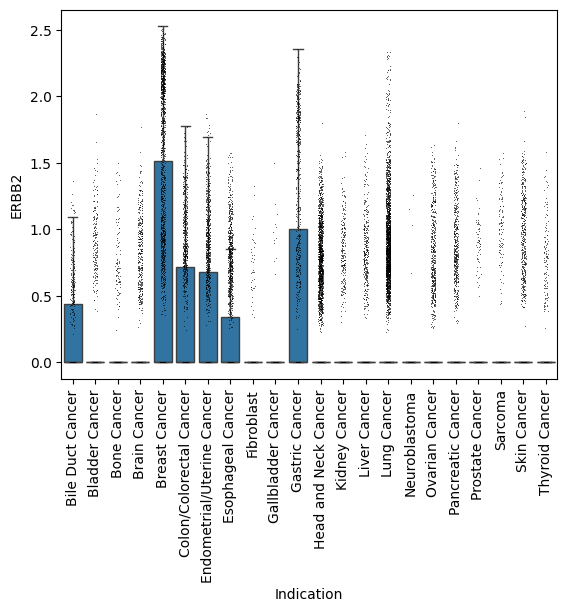

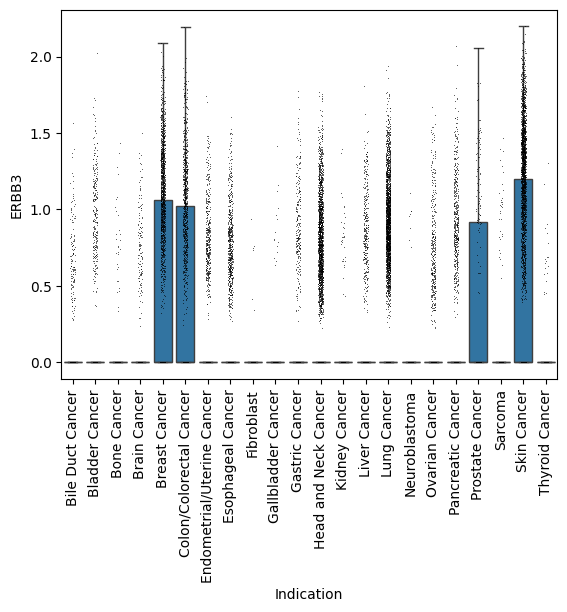

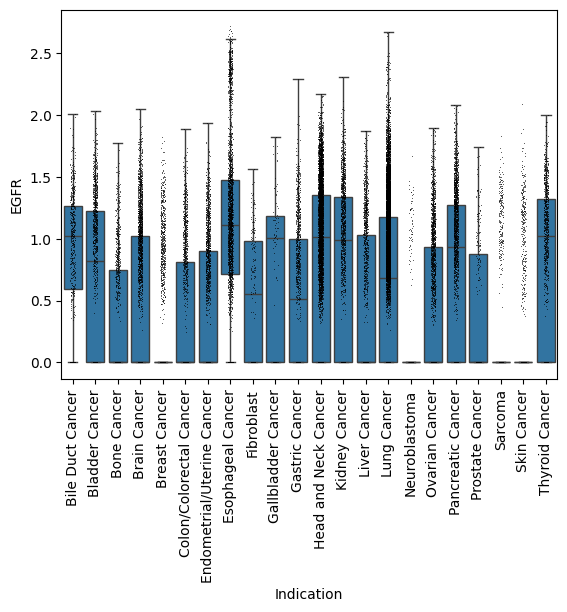

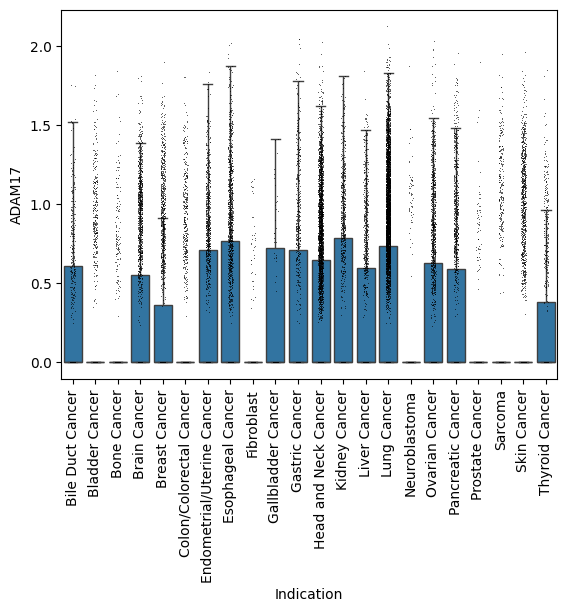

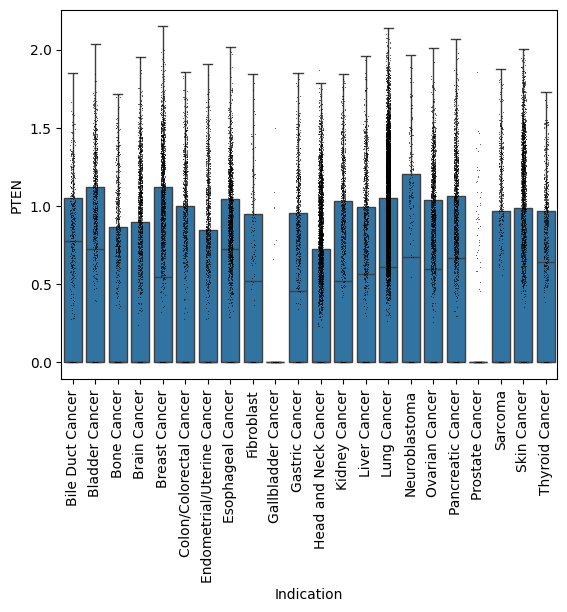

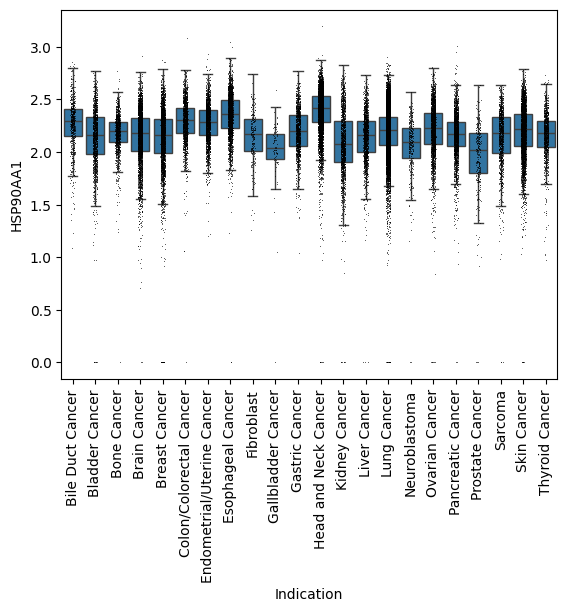

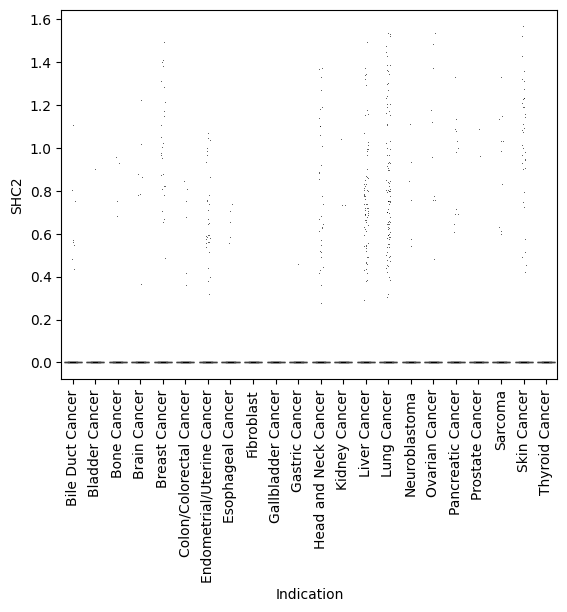

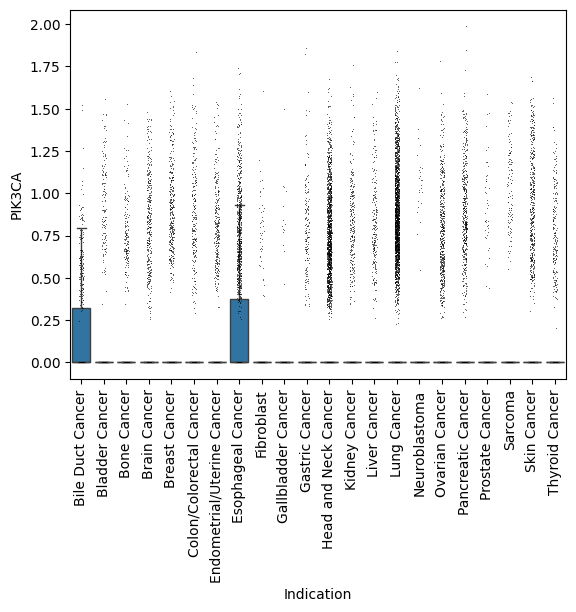

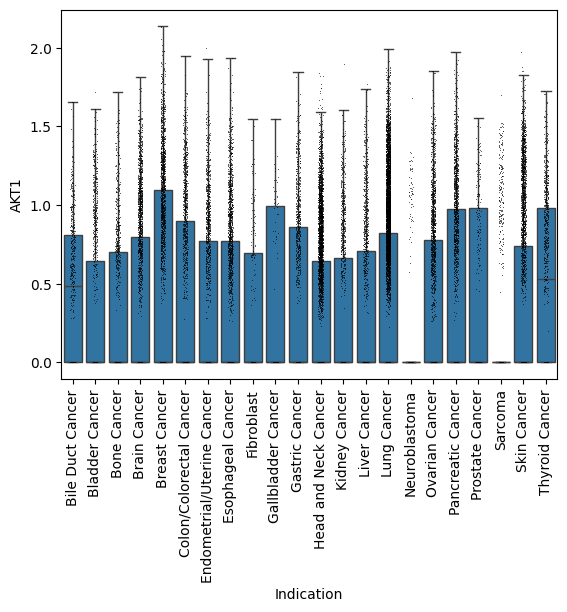

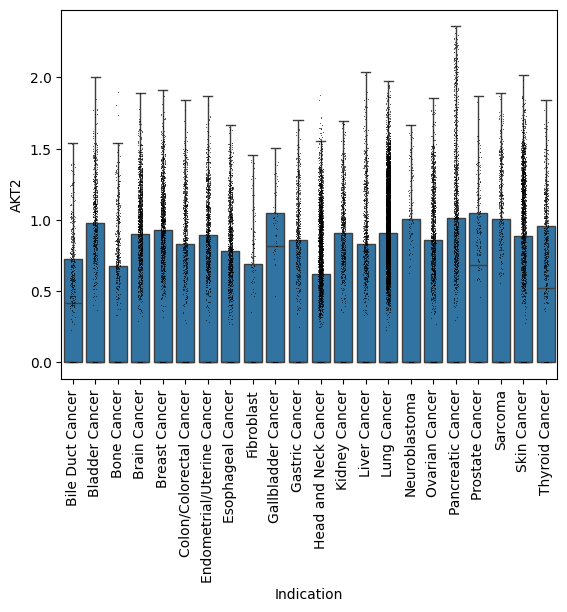

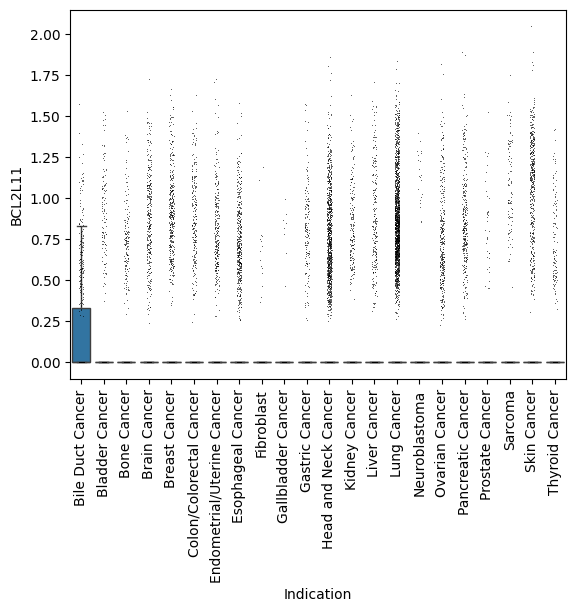

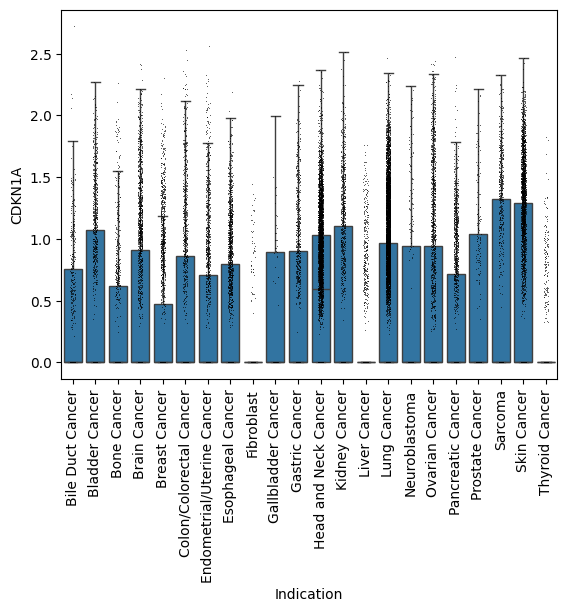

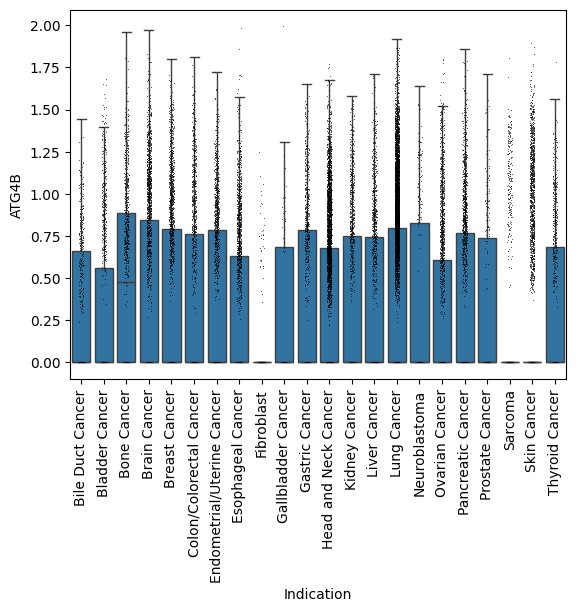

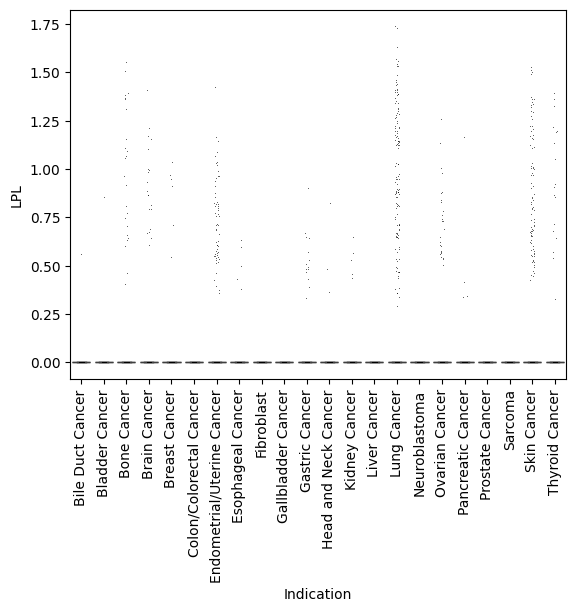

In [ ]:
for i, gene in enumerate(genes):
  #axs[i].tick_params(axis='x', labelrotation=90)
  x = sns.boxplot(
    data=df,
    x='Indication',
    y=gene,
    showfliers=False,
    #ax=axs[i]
    )

  x = sns.stripplot(
    data=df,
    x='Indication',
    y=gene,
    color='black',
    size=0.5,
    jitter=True,
    #ax=axs[i]
    )
  x.tick_params(axis='x', labelrotation=90)
  plt.show()

#Takeaways:
#Bile duct cancer, endometrial cancer, esophageal cancer, and colorectal cancer show high HER2 expression and can be further analysed for Trastuzumab repurposing.
#Colorectal cancer and breast cancer both show high HER3 expressions.
#Most of the cell lines mentioned above have high EGFR expression but Bile duct cancer and esophageal cancer show higher expression.
#All cell lines mentioned above have high ADAM17 expression, meaning high HER ligand production.
#PTEN is highly expressed in nearly all cell lines.
#Cell lines mentioned above don't differ much in HSP90 expression, and might not show resistance to Trastuzumab at least by HSP90 activation.
#PIK3CA is highly expressed in Bile duct cancer and esophageal cancer, showing these two have possibly higher AKT pathwaay activity.
#further analysis should be done to confirm higher activity of the AKT pathway in bile duct cancer and the role of high EGFR expression in both Bile duct cancer and esophageal cancer.

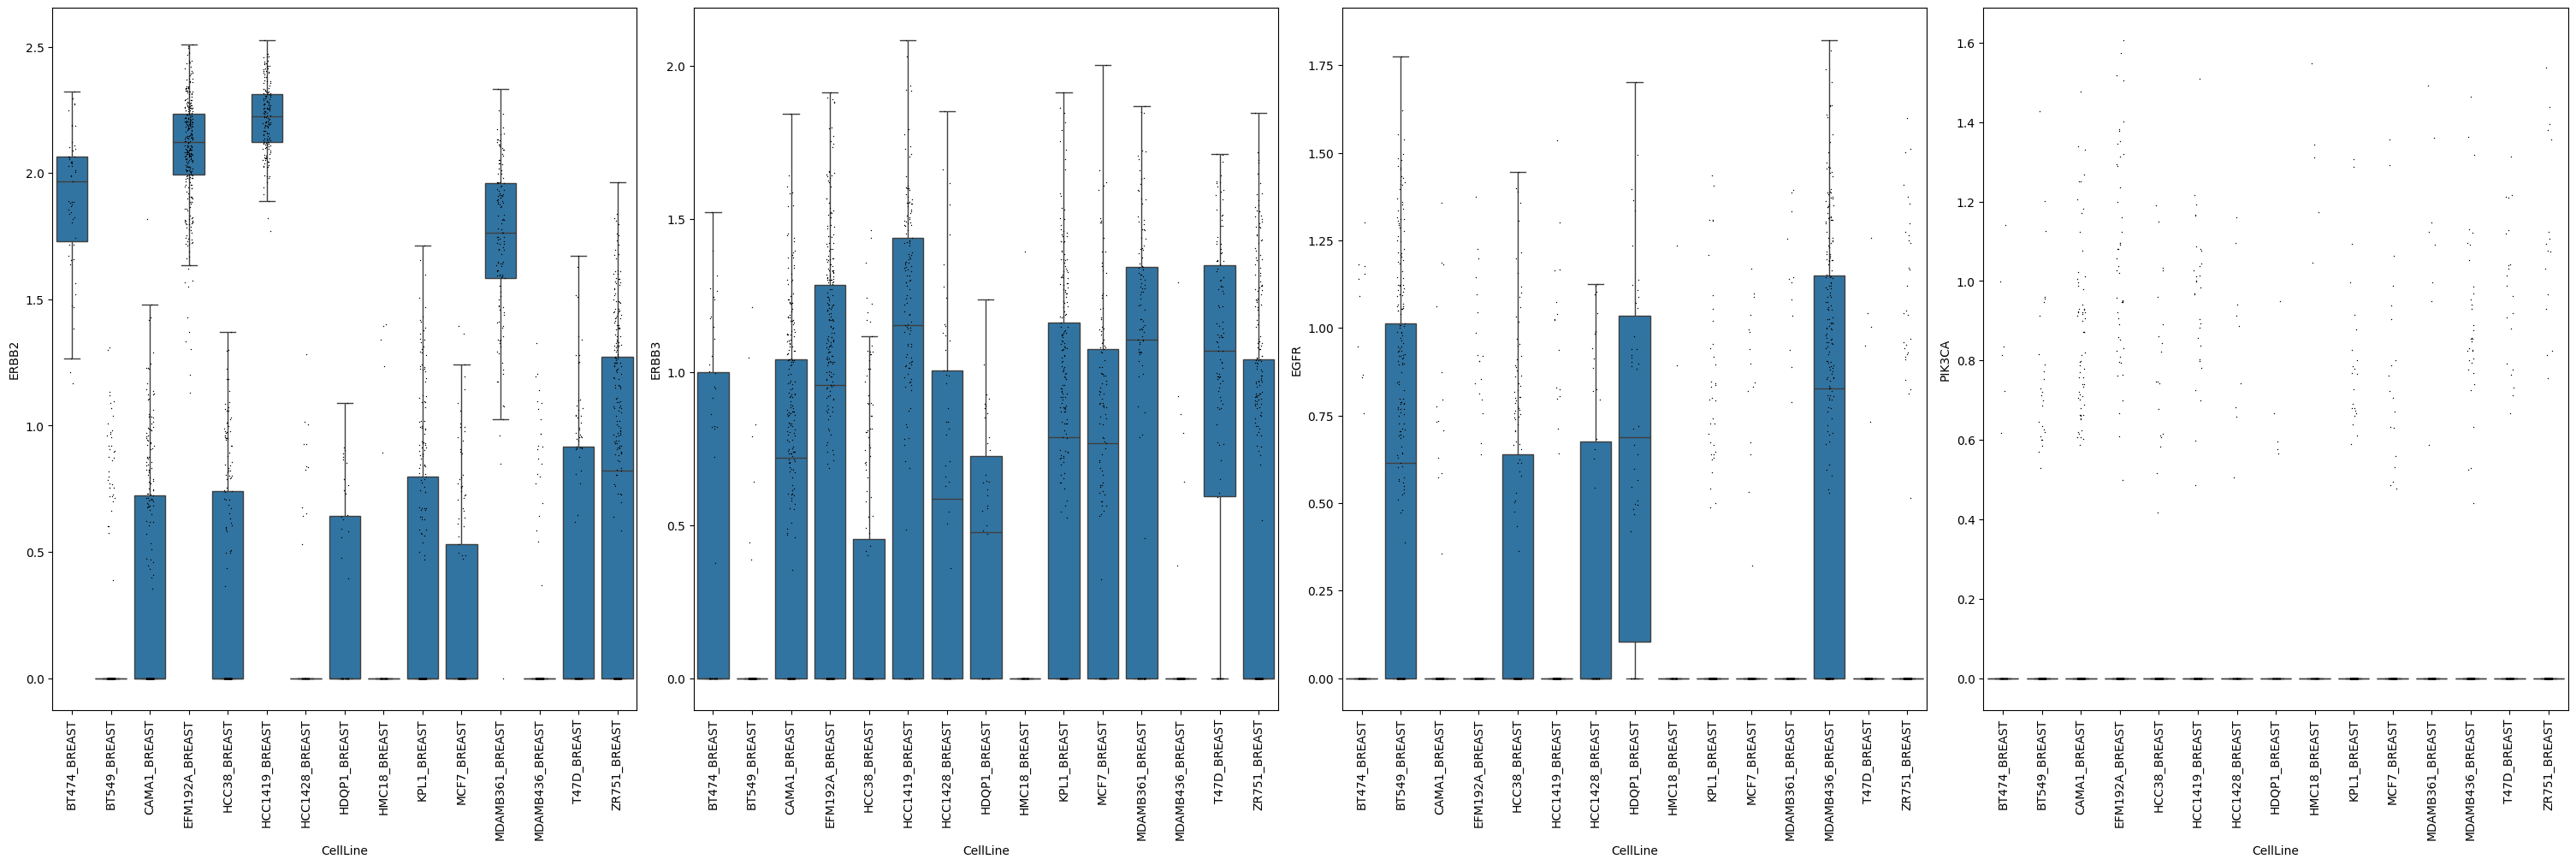

In [ ]:
adata_breast = adata[adata.obs.Indication=="Breast Cancer"].copy()
df = sc.get.obs_df(adata_breast, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_breast.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#We can see that most but not all HER2 positive breast cancer cell lines highly express HER3 but not EGFR or PIK3CA

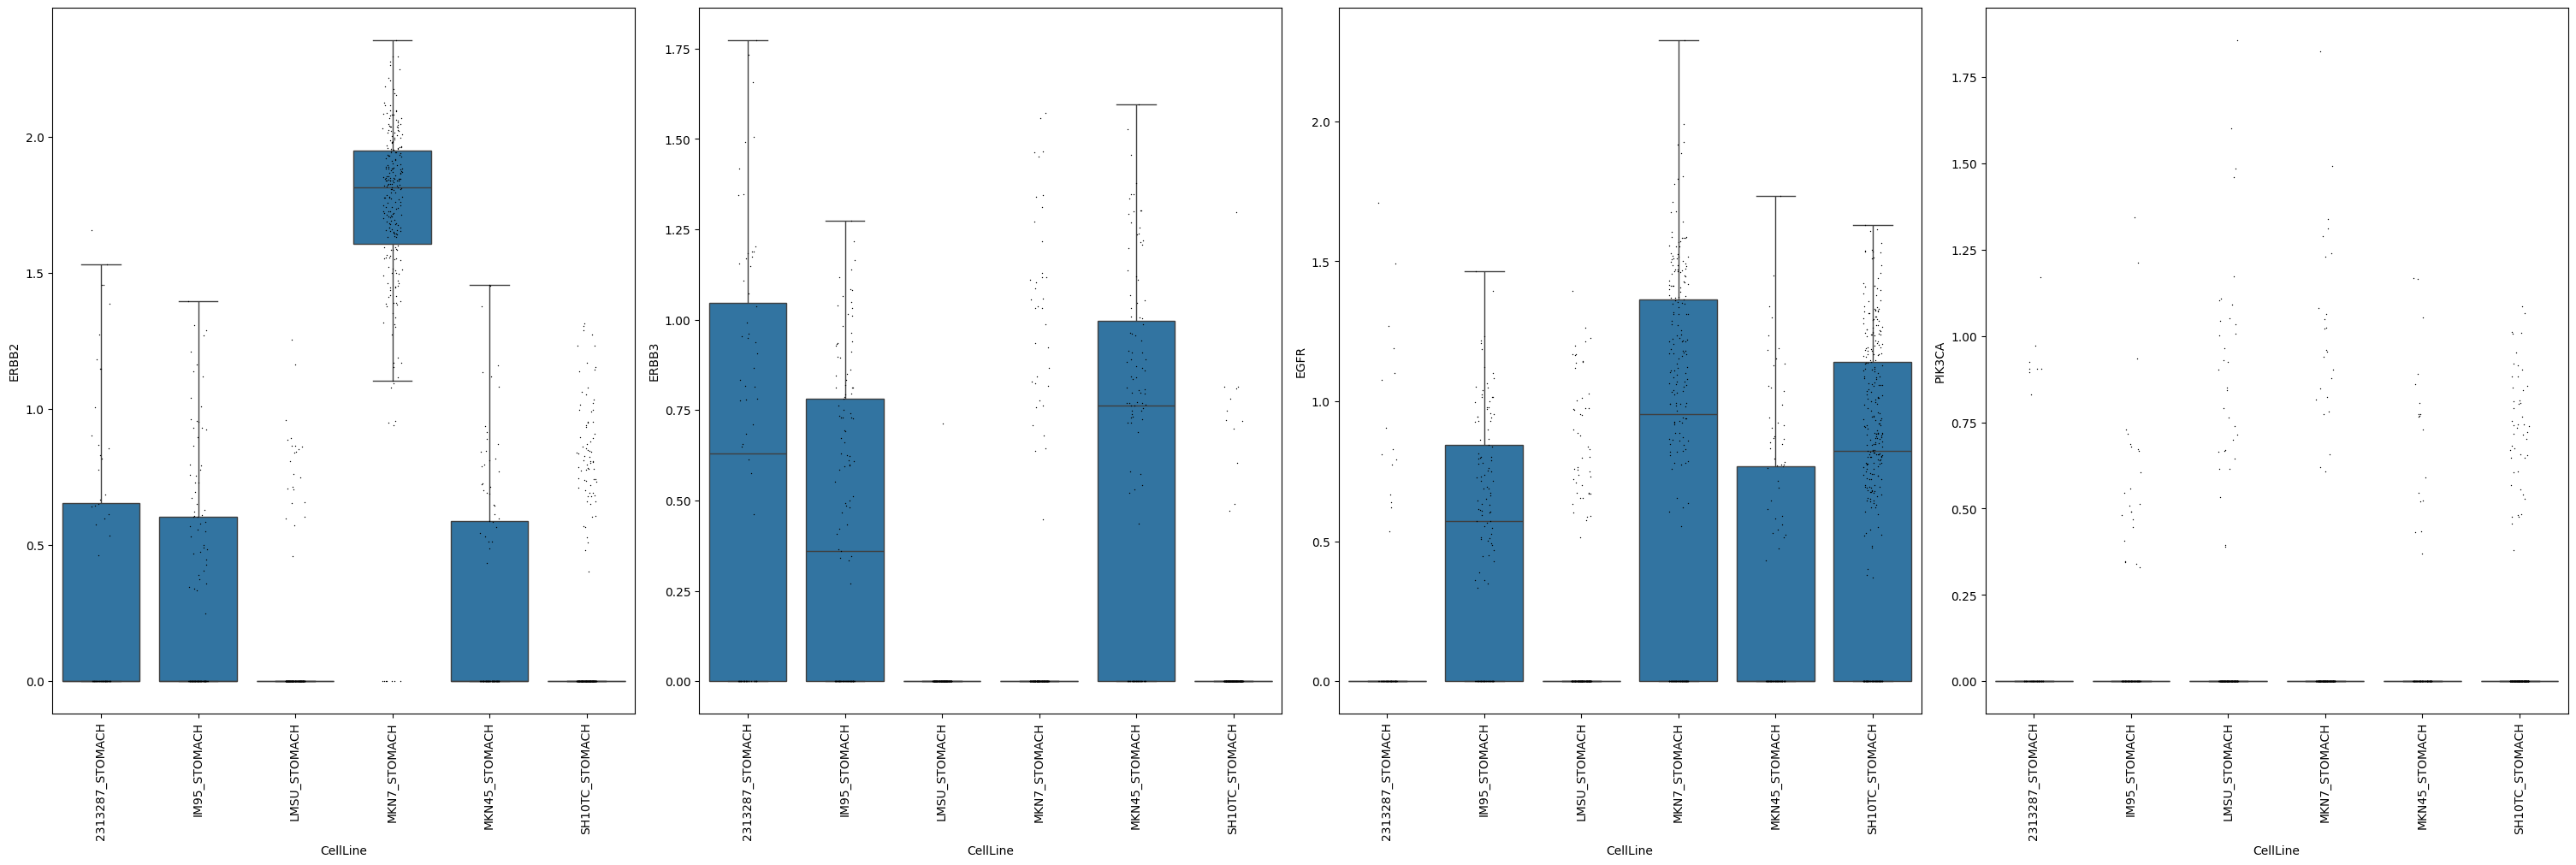

In [ ]:
adata_gastric = adata[adata.obs.Indication=="Gastric Cancer"].copy()
df = sc.get.obs_df(adata_gastric, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_gastric.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#In gastric cancer, we can see that the the HER2 positice cell line is also highly expressing EGFR, but not HER3

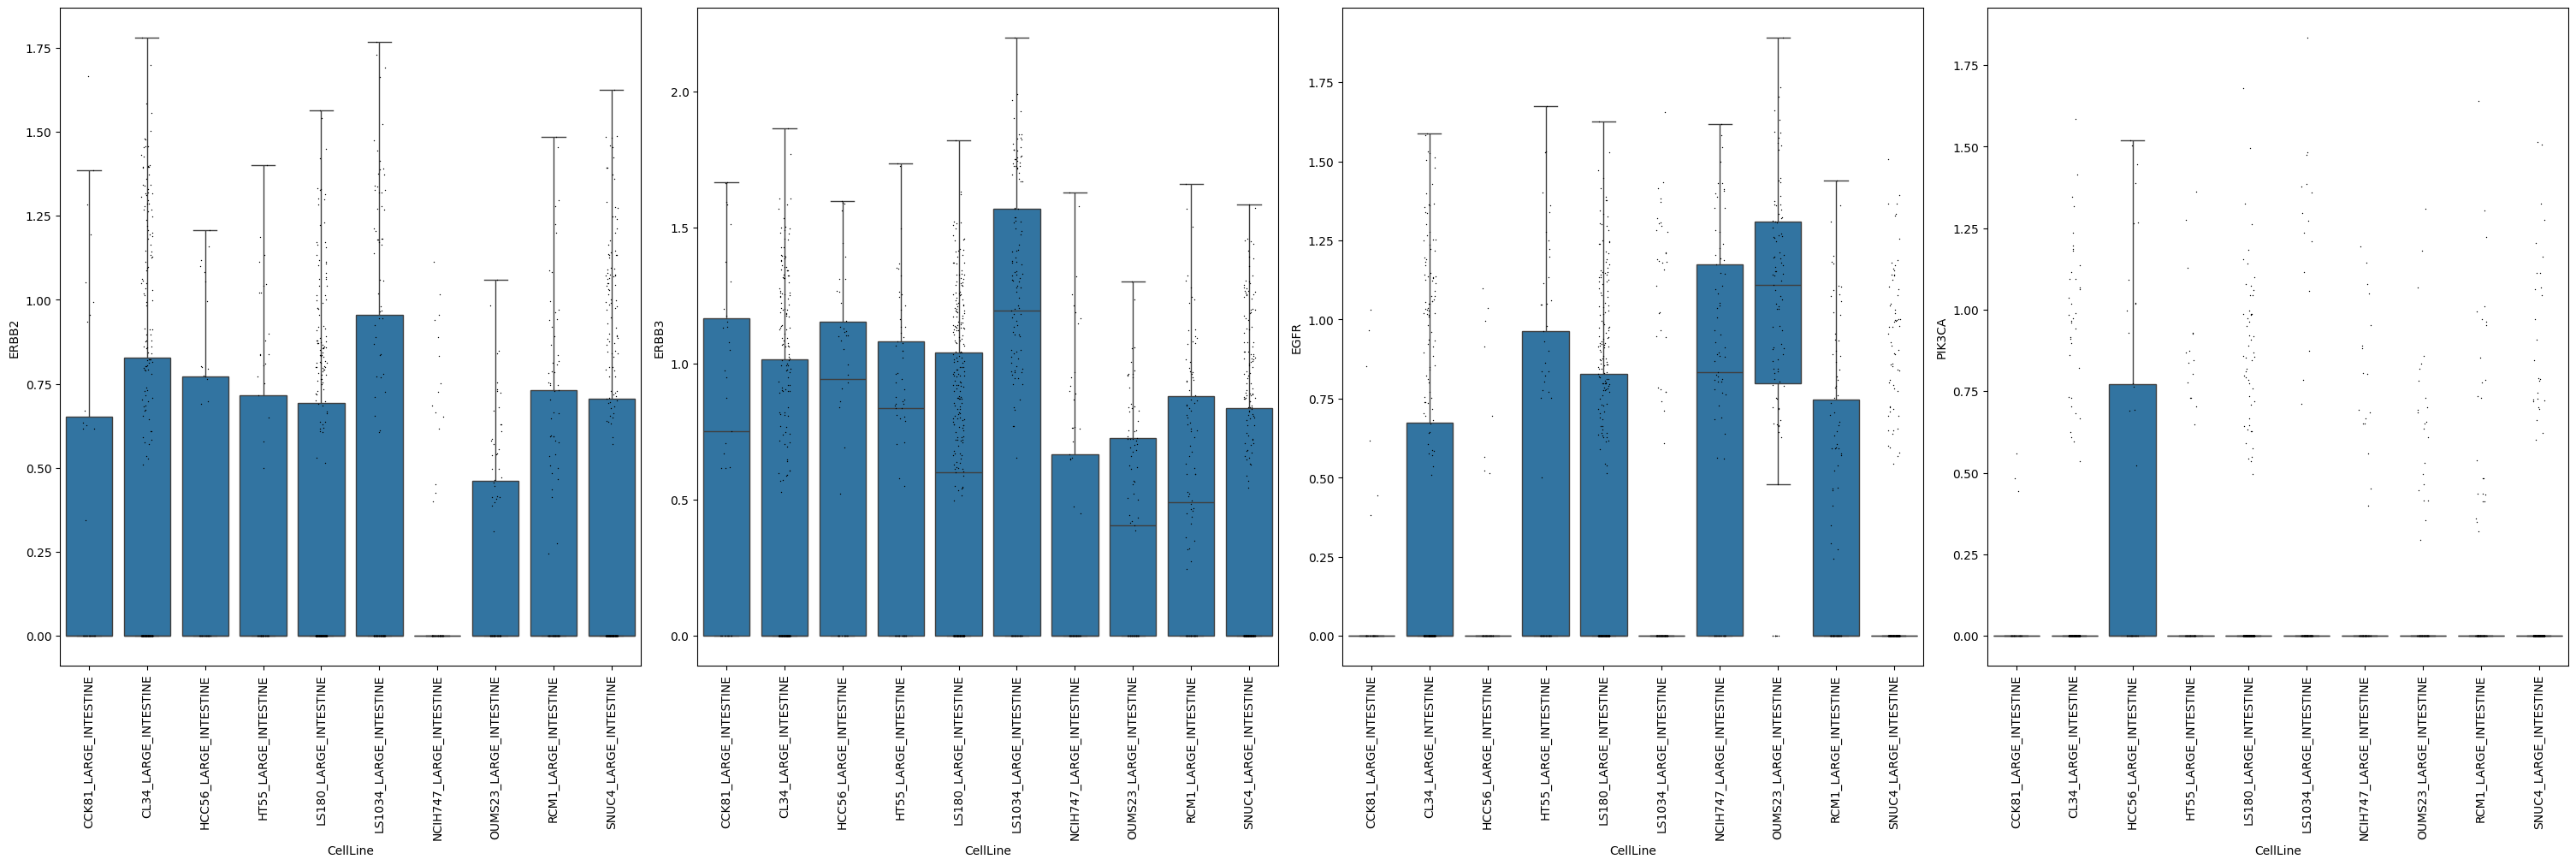

In [ ]:
adata_colorectal = adata[adata.obs.Indication=="Colon/Colorectal Cancer"].copy()
df = sc.get.obs_df(adata_colorectal, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_colorectal.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#In colorecal cancer, most cell lines highly express HER2, and therefore it might be a good candidate for further analysis.

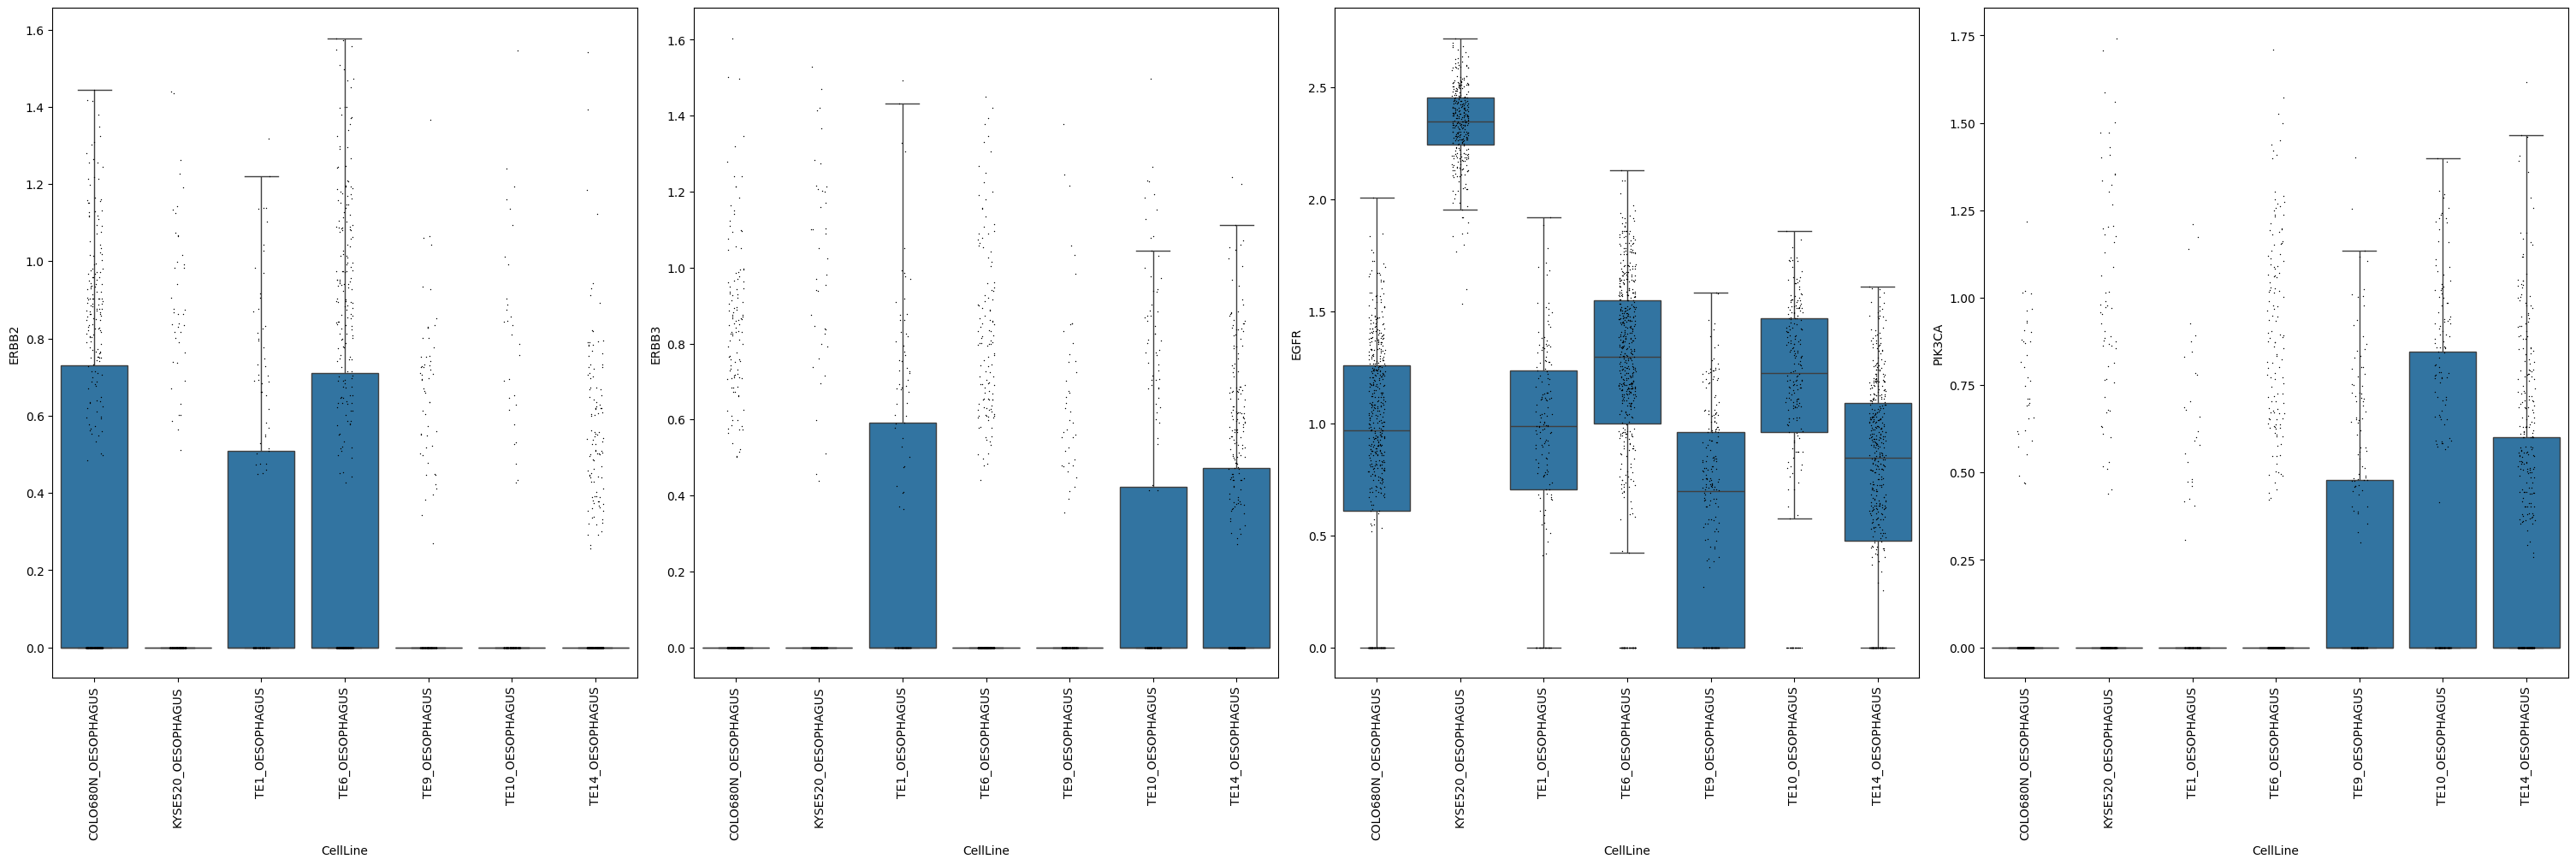

In [ ]:
adata_esophageal = adata[adata.obs.Indication=="Esophageal Cancer"].copy()
df = sc.get.obs_df(adata_esophageal, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_esophageal.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#In esophageal cancer, some cell lines are HER2 positives which also highly express EGFR.

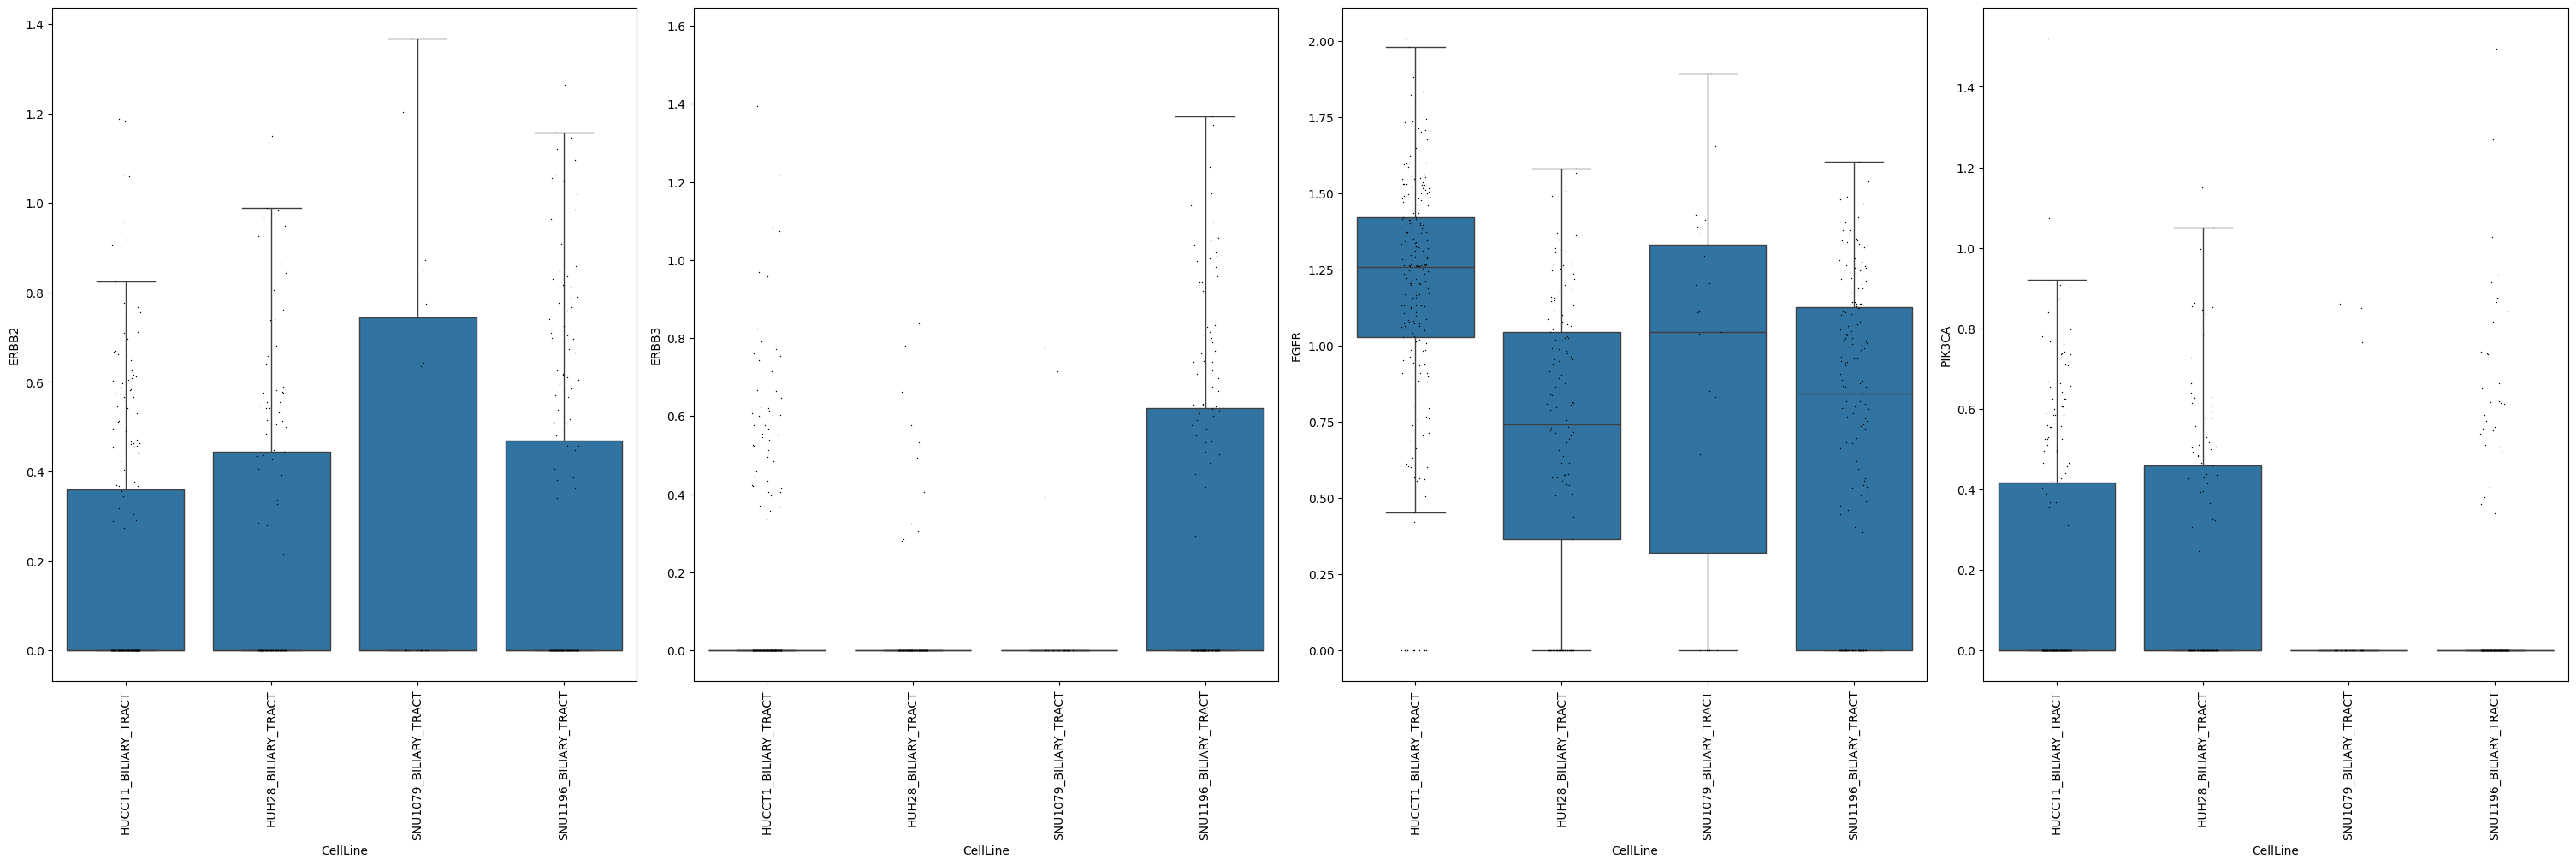

In [ ]:
adata_bile_duct = adata[adata.obs.Indication=="Bile Duct Cancer"].copy()
df = sc.get.obs_df(adata_bile_duct, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_bile_duct.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#In bile duct cancer. like colorectal cancer, all cell lines are HER2 positive and all highly express EGFR.

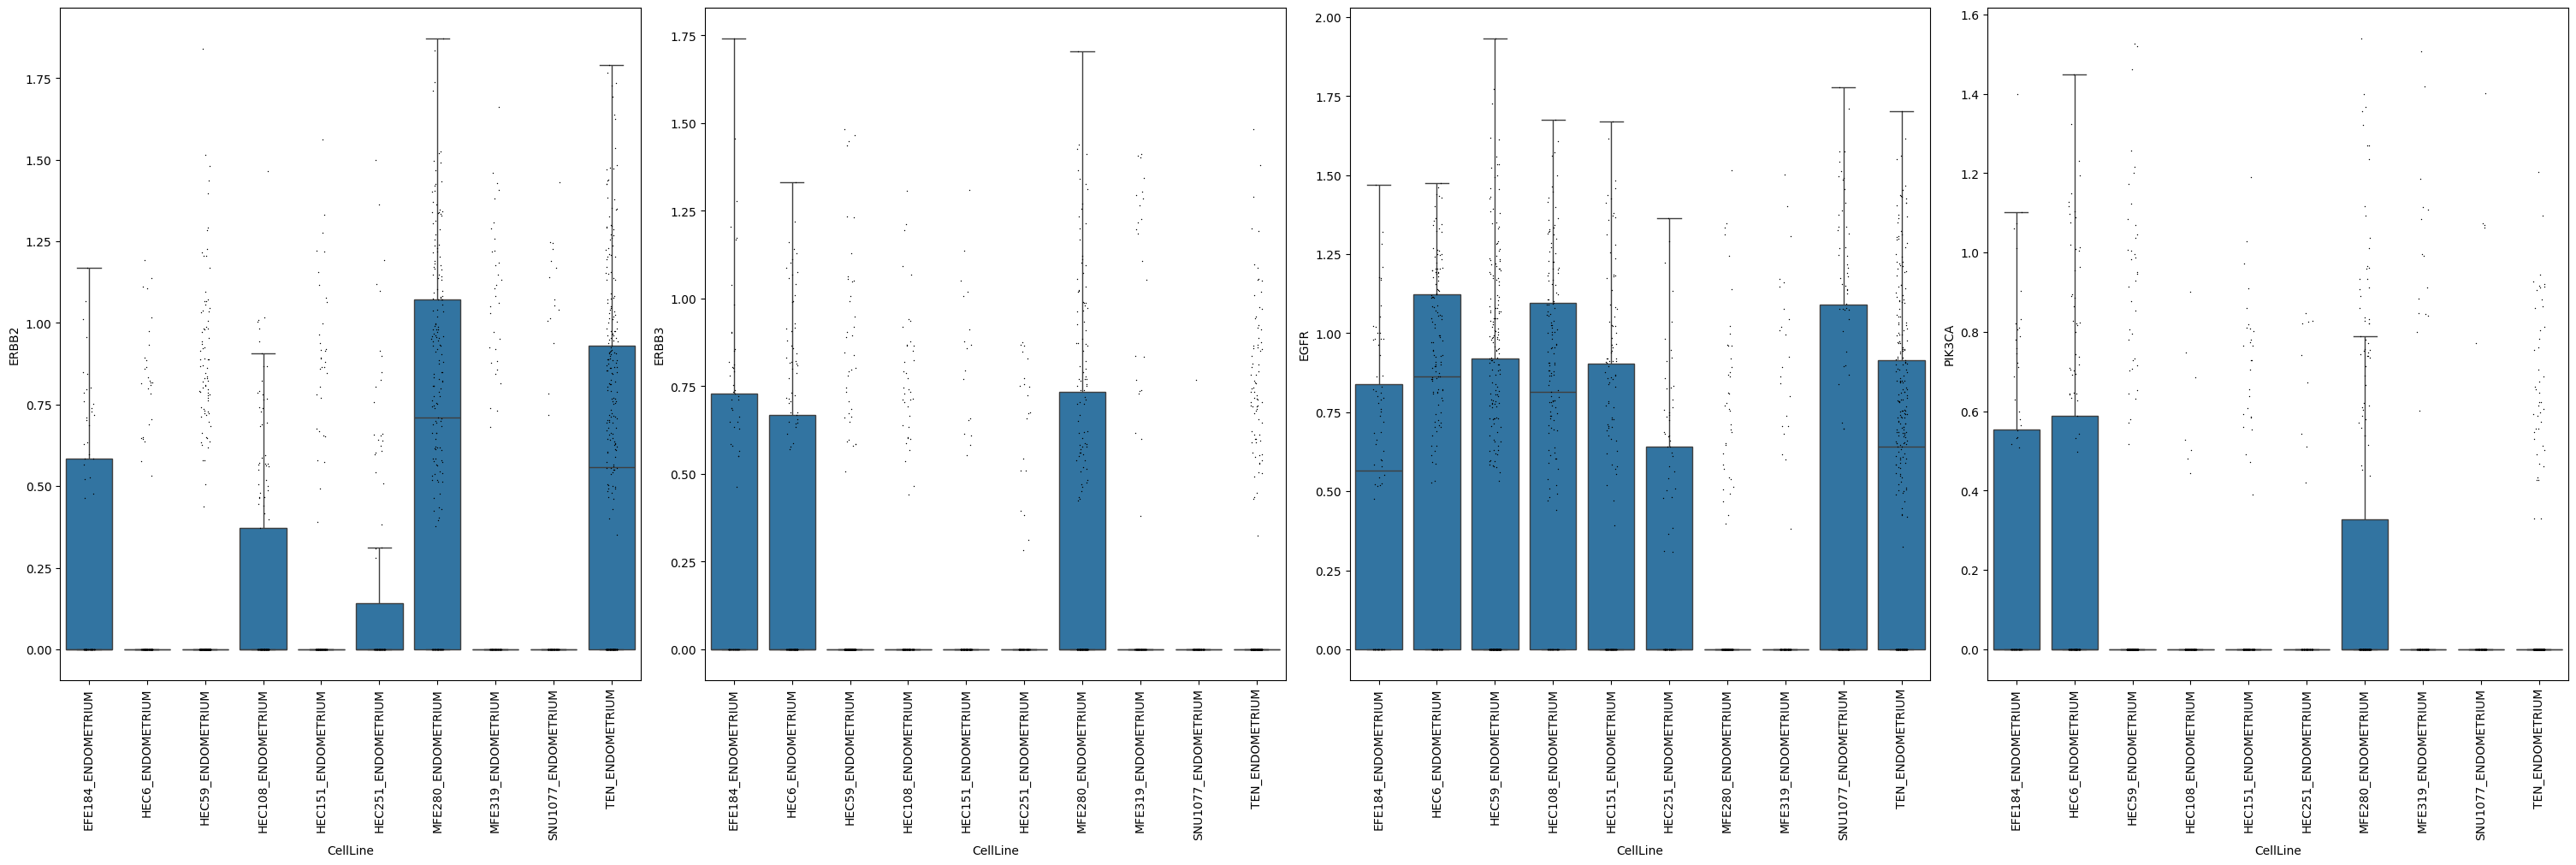

In [ ]:
adata_endometrial = adata[adata.obs.Indication=="Endometrial/Uterine Cancer"].copy()
df = sc.get.obs_df(adata_endometrial, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["CellLine"] = adata_endometrial.obs.CellLine

fig, axs = plt.subplots(1, 4, figsize=(30,10), layout="constrained")
#sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=0.7)

axs[0] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    showfliers=False,
    ax=axs[0]
)

axs[0] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB2",
    color="black",
    size=1,
    jitter=True,
    ax=axs[0]
)


axs[1] = sns.boxplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    showfliers=False,
    ax=axs[1]
)

axs[1] = sns.stripplot(
    data=df,
    x="CellLine",
    y="ERBB3",
    color="black",
    size=1,
    jitter=True,
    ax=axs[1]
)


axs[2] = sns.boxplot(
    data=df,
    x="CellLine",
    y="EGFR",
    showfliers=False,
    ax=axs[2]
)

axs[2] = sns.stripplot(
    data=df,
    x="CellLine",
    y="EGFR",
    color="black",
    size=1,
    jitter=True,
    ax=axs[2]
)


axs[3] = sns.boxplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    showfliers=False,
    ax=axs[3]
)

axs[3] = sns.stripplot(
    data=df,
    x="CellLine",
    y="PIK3CA",
    color="black",
    size=1,
    jitter=True,
    ax=axs[3]
)

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)


plt.show()

#In endometrial cancer, some HER2 positive cell lines are HER3 positive which all also show high PIK3CA expression.
#This might show that HER3/HER2 positive endometrial cell lines have high PI3K/AKT pathway activity due HER2/HER3 heterocomplex formation.
#These cell lines might be good candidates for repurposing Trastuzumab

**Clustering**

In [ ]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.2 MB/s eta 0:00:00


In [ ]:
pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00


In [ ]:
import matplotlib

In [ ]:
def run_leiden(data):
  sc.pp.neighbors(data, n_pcs=40)
  sc.tl.umap(data)
  sc.tl.leiden(data, key_added="leiden_0.25", resolution=0.25)
  sc.tl.leiden(data, key_added="leiden_0.5", resolution=0.5)
  sc.tl.leiden(data, key_added="leiden_0.75", resolution=0.75)
  sc.tl.leiden(data, key_added="leiden_1", resolution=1)

run_leiden(adata_breast)
run_leiden(adata_gastric)
run_leiden(adata_colorectal)
run_leiden(adata_esophageal)
run_leiden(adata_bile_duct)
run_leiden(adata_endometrial)

<ipython-input-17-a6b4fa942466>:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, key_added="leiden_0.25", resolution=0.25)


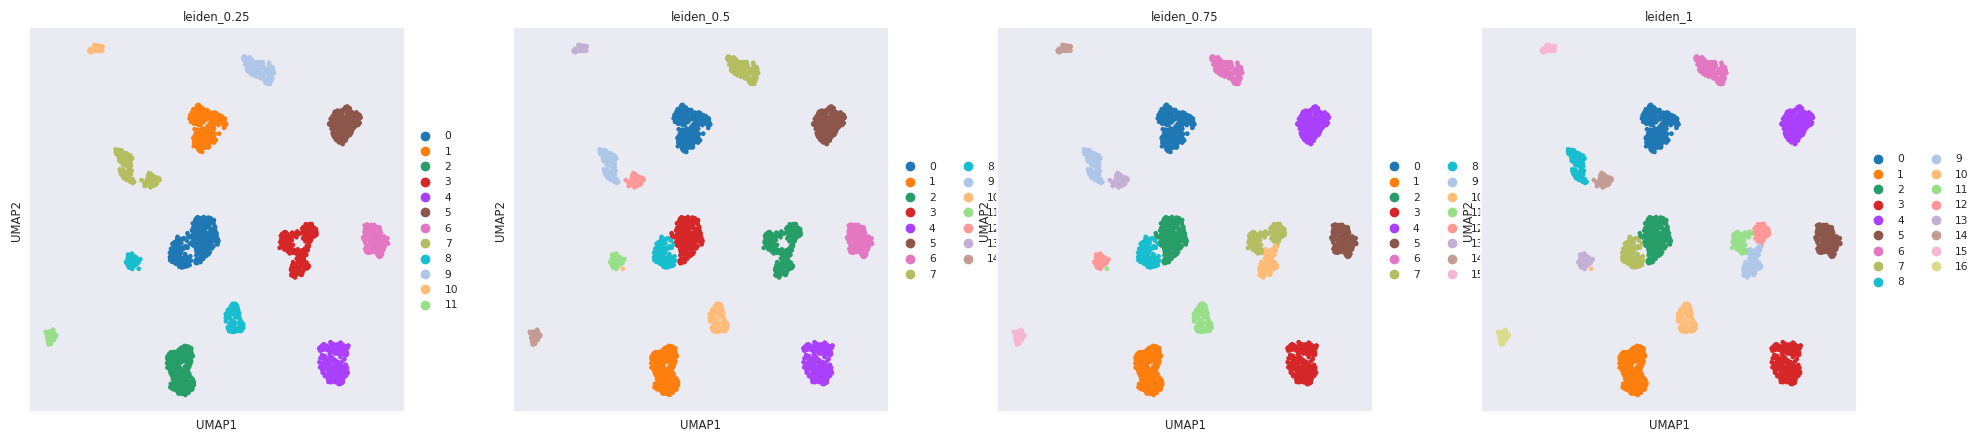

In [ ]:
sc.pl.umap(adata_breast, color=["leiden_0.25", "leiden_0.5", "leiden_0.75", "leiden_1"])
#resolution 0.75 seems better

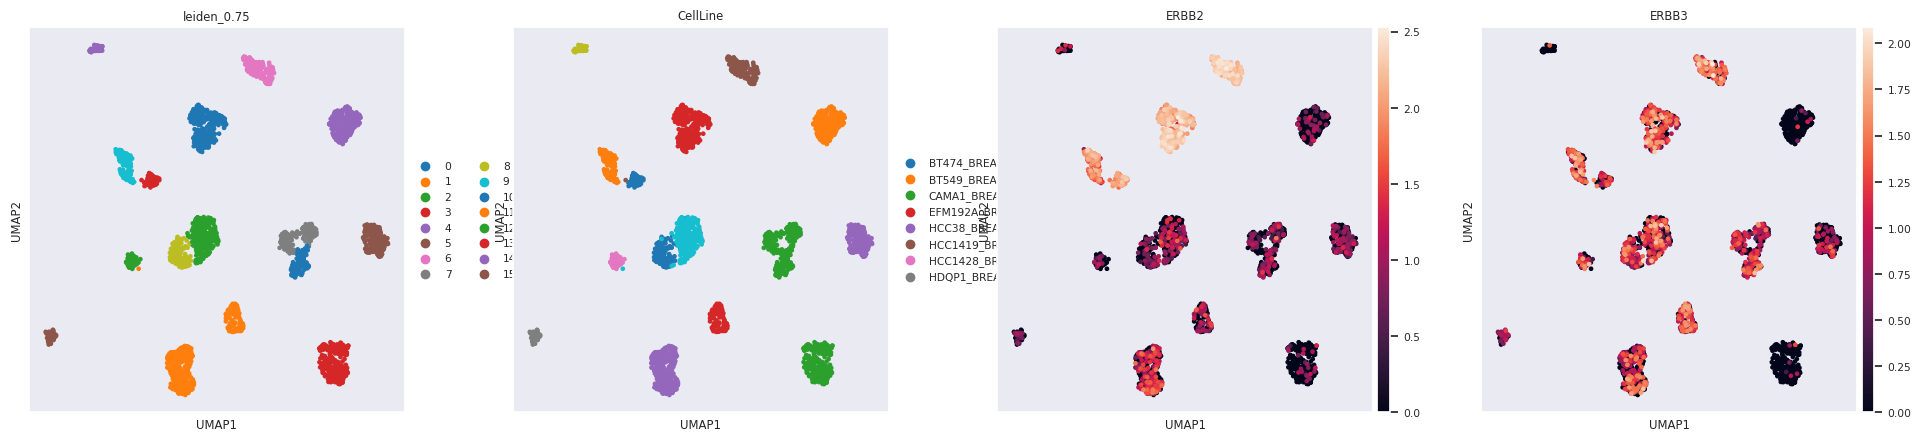

In [ ]:
sc.pl.umap(adata_breast, color=["leiden_0.75", "CellLine", "ERBB2", "ERBB3"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))
#Seems that some cell lines form two clusters. Interesting! Could that be due to different pool contents?

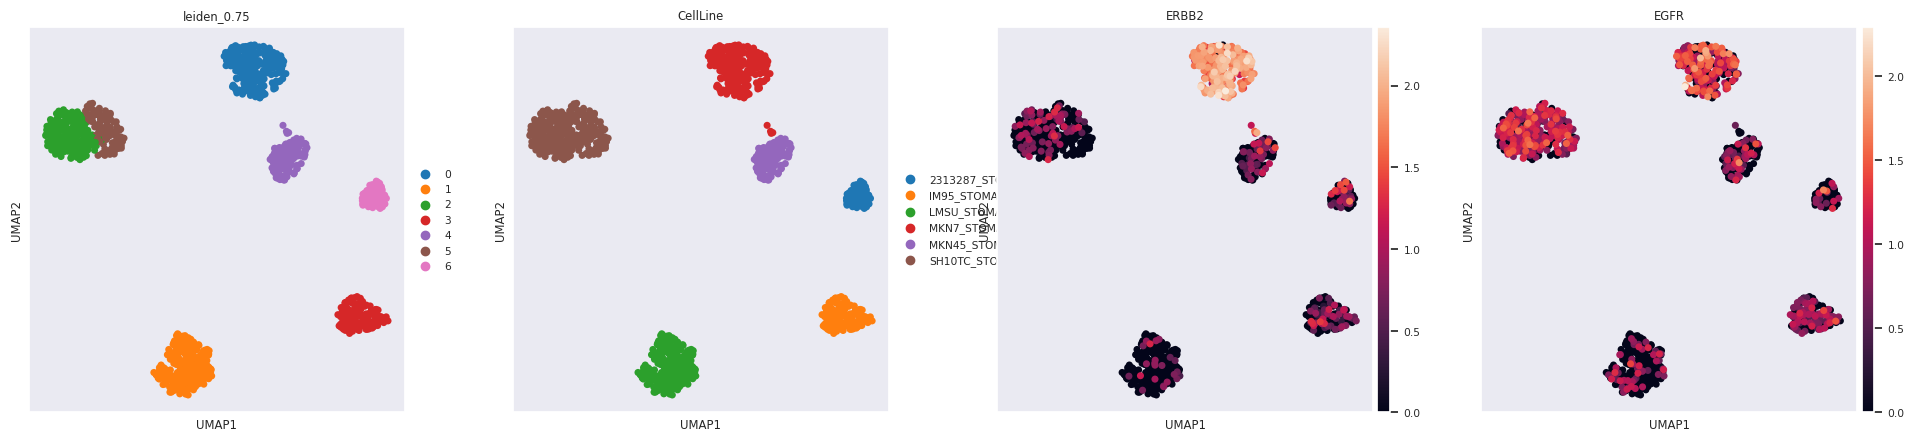

In [ ]:
sc.pl.umap(adata_gastric, color=["leiden_0.75", "CellLine", "ERBB2", "EGFR"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

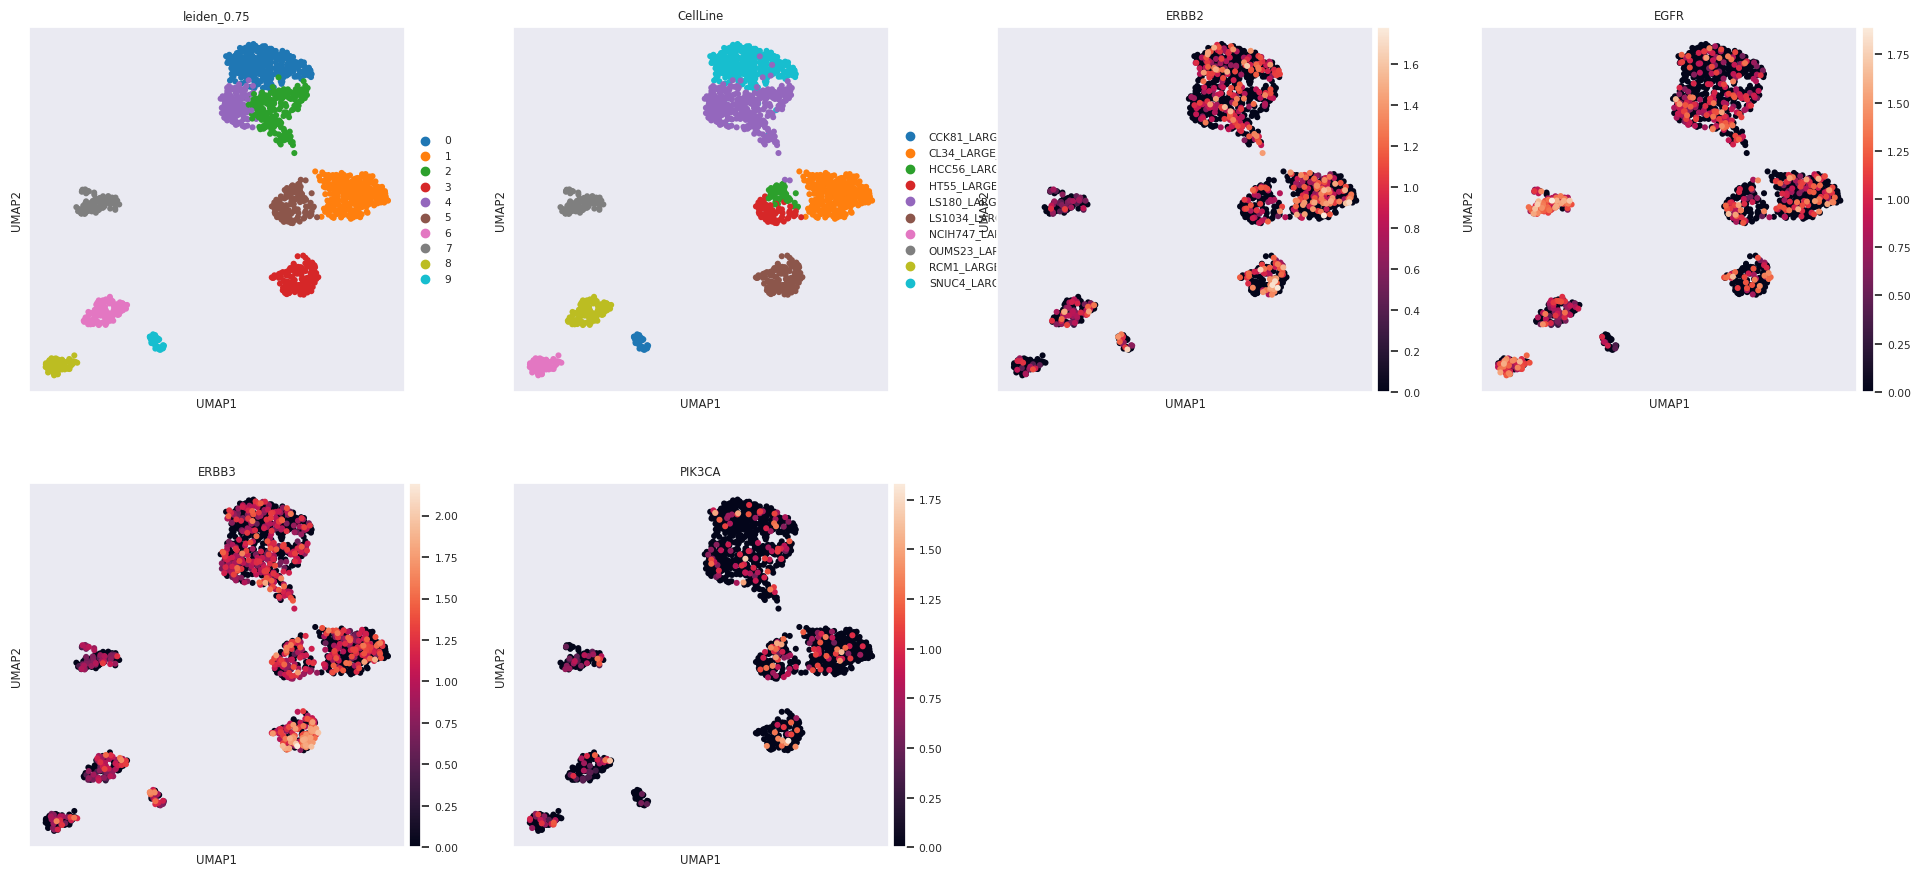

In [ ]:
sc.pl.umap(adata_colorectal, color=["leiden_0.75", "CellLine", "ERBB2", "EGFR", "ERBB3", "PIK3CA"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

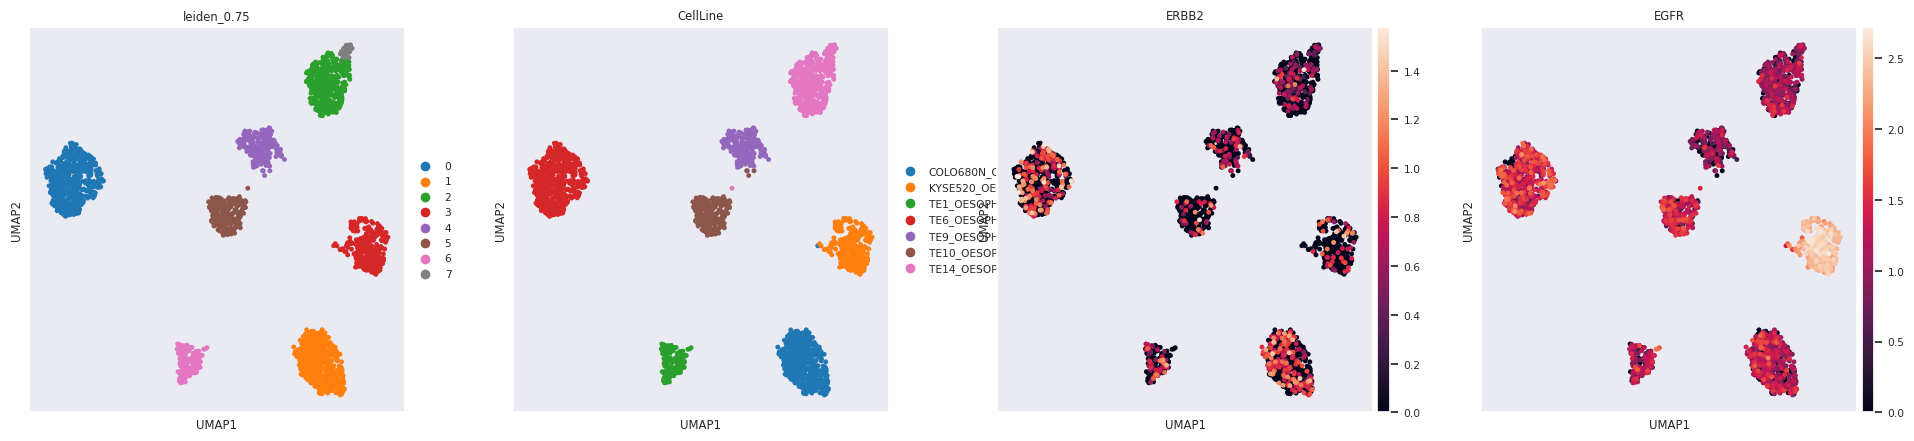

In [ ]:
sc.pl.umap(adata_esophageal, color=["leiden_0.75", "CellLine", "ERBB2", "EGFR"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

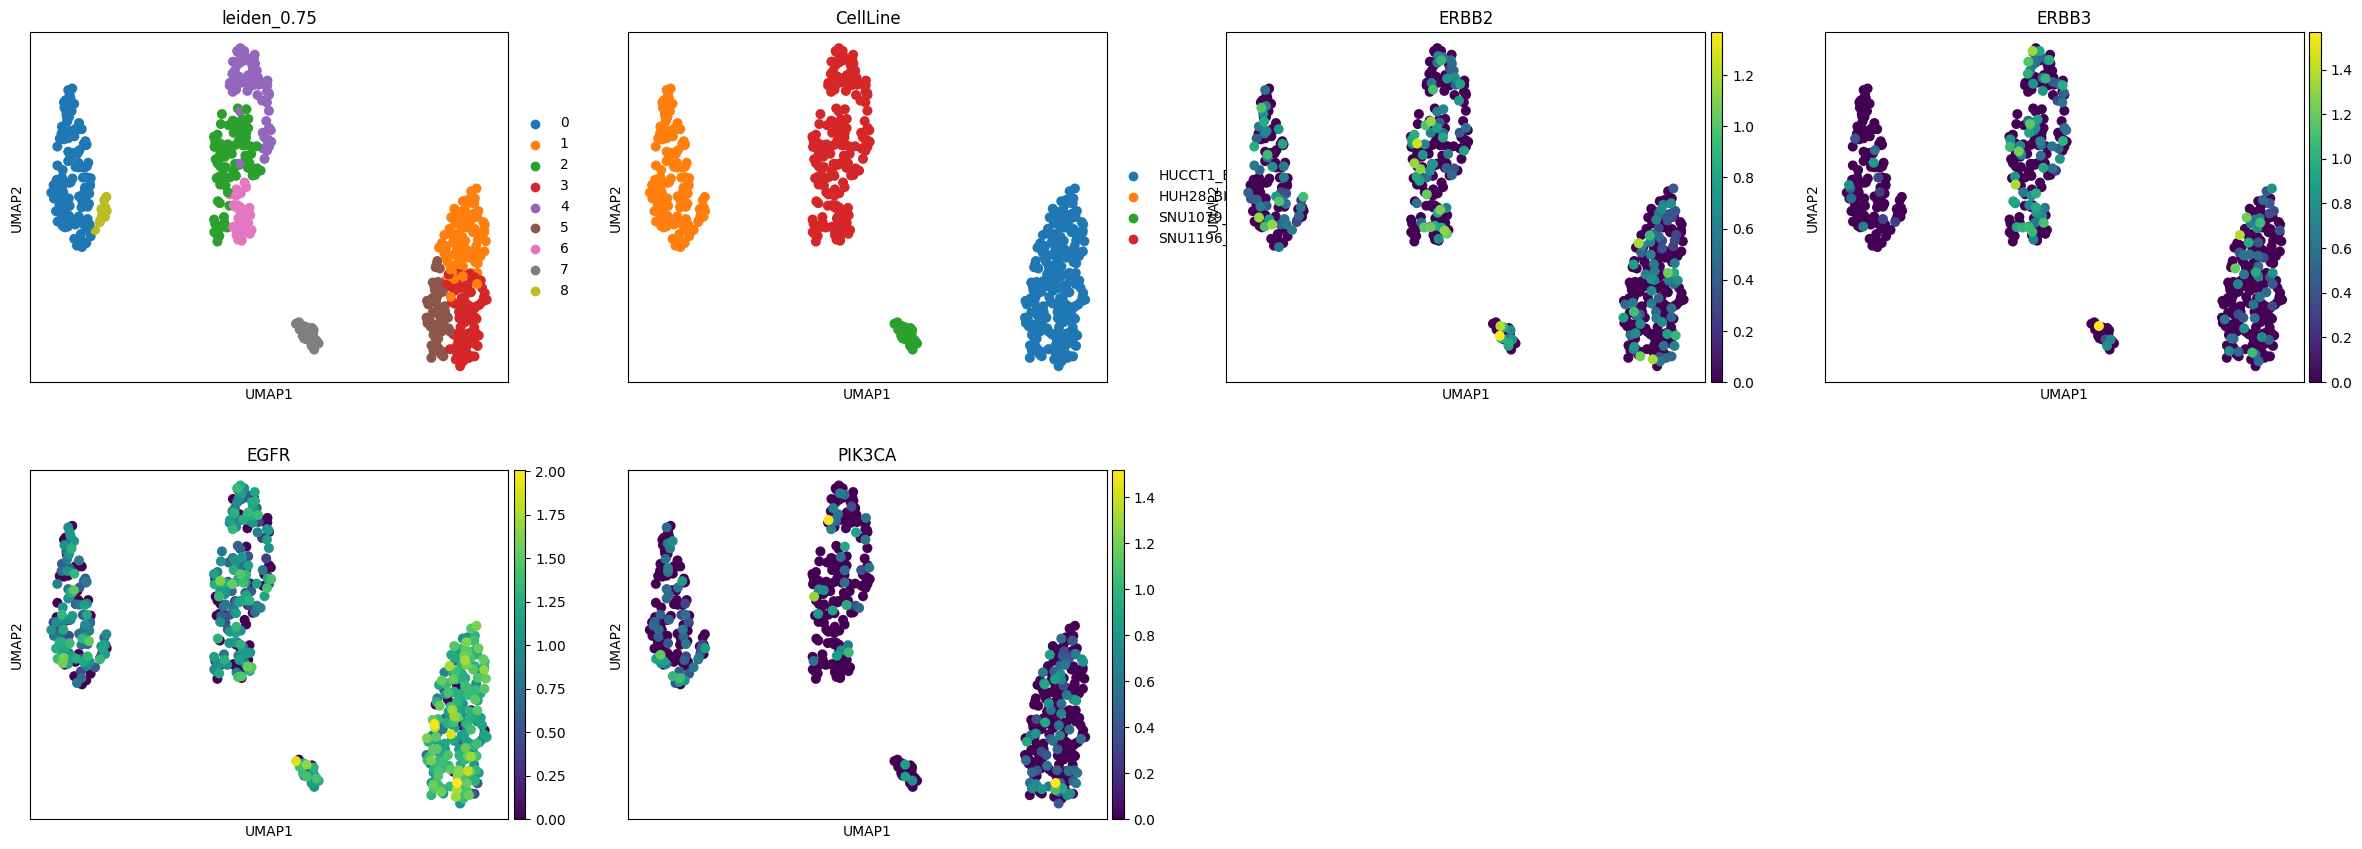

In [ ]:
sc.pl.umap(adata_bile_duct, color=["leiden_0.75", "CellLine", "ERBB2", "ERBB3", "EGFR", "PIK3CA"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

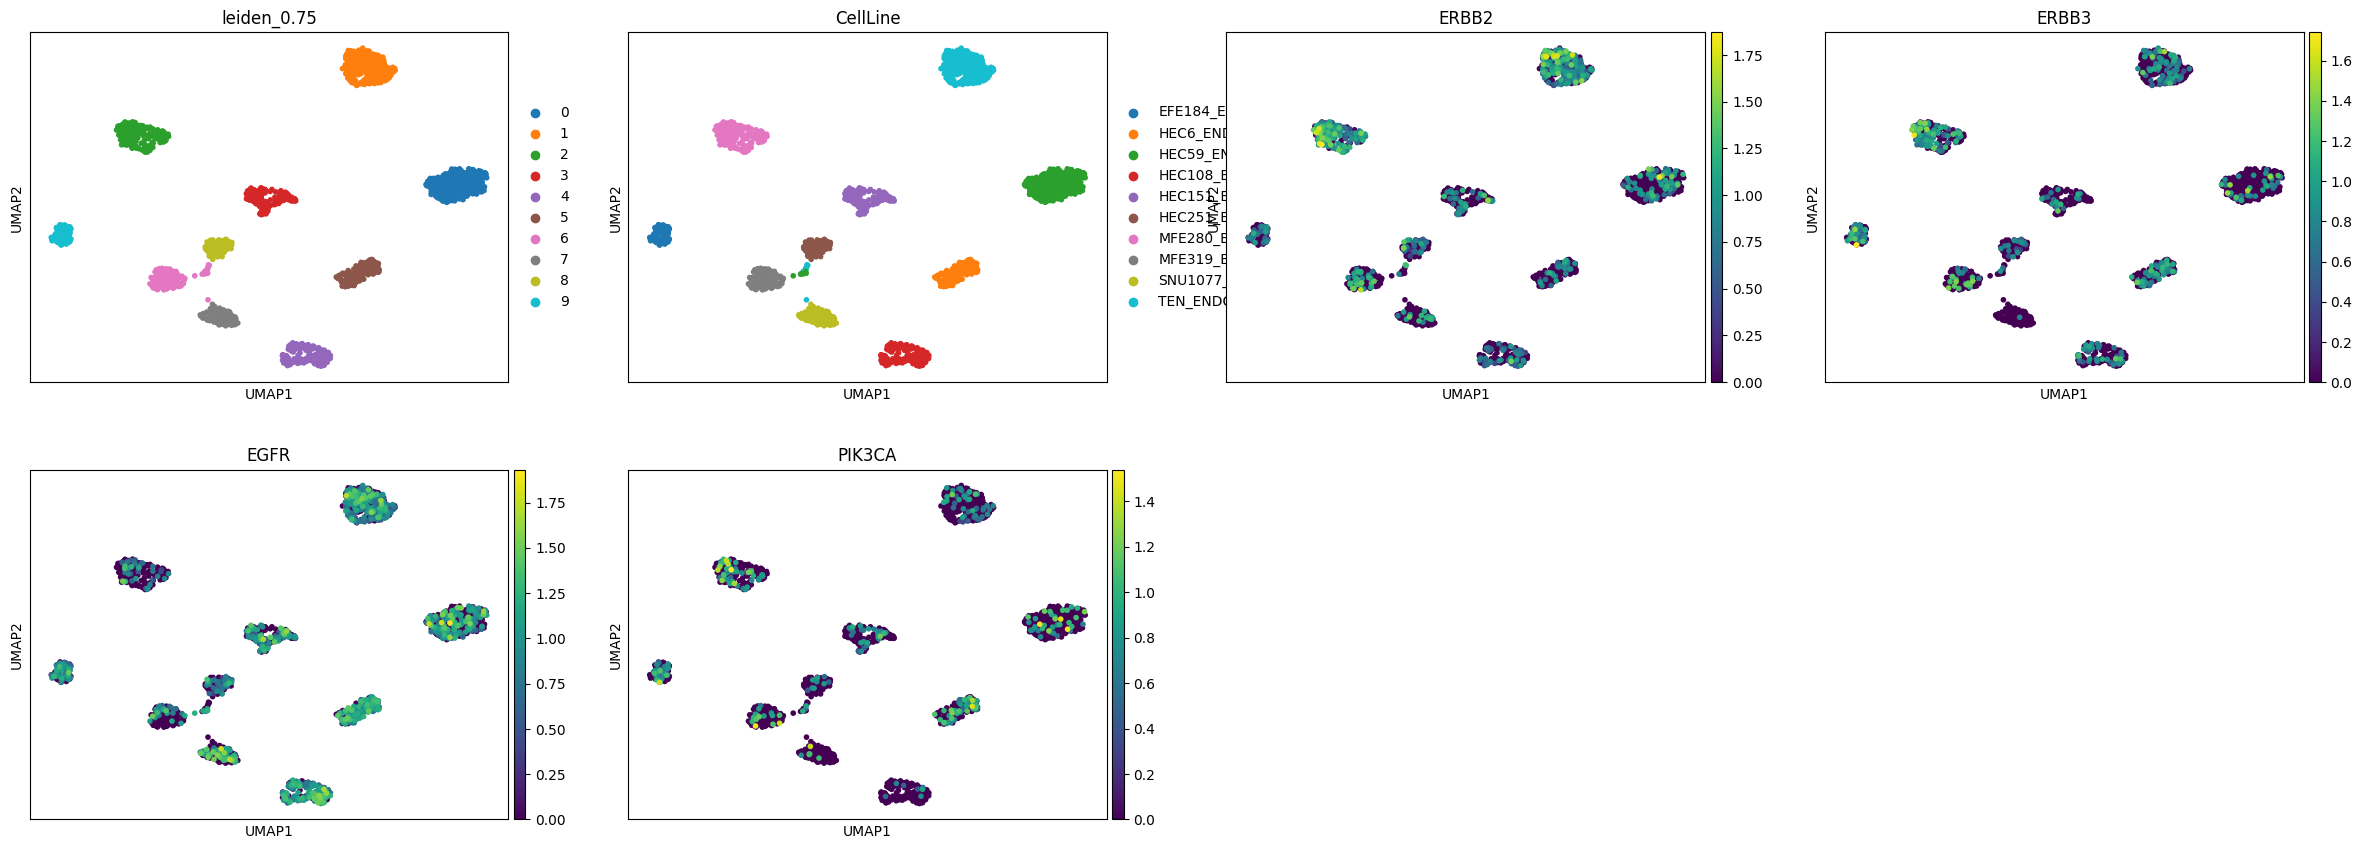

In [ ]:
sc.pl.umap(adata_endometrial, color=["leiden_0.75", "CellLine", "ERBB2", "ERBB3", "EGFR", "PIK3CA"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

Load adata with decouplR functional acitivity scores from Bevacizumab_EDA

In [8]:
adata = sc.read("/ya.yaghooti@gmail.com/MyDrive/F1L_compbio_internship/outs/240701_kinker_anndata_preprocessed_with_clustering_and_decouplr.h5ad")

In [12]:
adata.obsm["ora_estimate"].columns

Index(['HALLMARK_ADIPOGENESIS', 'HALLMARK_ALLOGRAFT_REJECTION',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_ANGIOGENESIS',
       'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE',
       'HALLMARK_APOPTOSIS', 'HALLMARK_BILE_ACID_METABOLISM',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_COAGULATION',
       'HALLMARK_COMPLEMENT', 'HALLMARK_DNA_REPAIR', 'HALLMARK_E2F_TARGETS',
       'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_FATTY_ACID_METABOLISM', 'HALLMARK_G2M_CHECKPOINT',
       'HALLMARK_GLYCOLYSIS', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_HEME_METABOLISM', 'HALLMARK_HYPOXIA',
       'HALLMARK_IL2_STAT5_SIGNALING', 'HALLMARK_IL6_JAK_STAT3_SIGNALING',
       'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_KRAS_SIGNALING_DN',
       'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_MITOTIC_SPINDLE

In [13]:
df = sc.get.obs_df(adata, keys=["ERBB2", "ERBB3", "EGFR", "PIK3CA"])
df["Indication"] = adata.obs["Indication"]
df["HALLMARK_PI3K_AKT_MTOR_SIGNALING"] = adata.obsm["ora_estimate"]["HALLMARK_PI3K_AKT_MTOR_SIGNALING"]

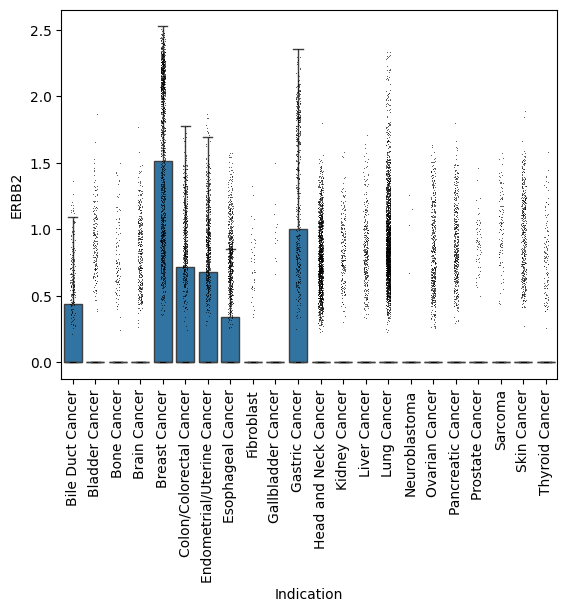

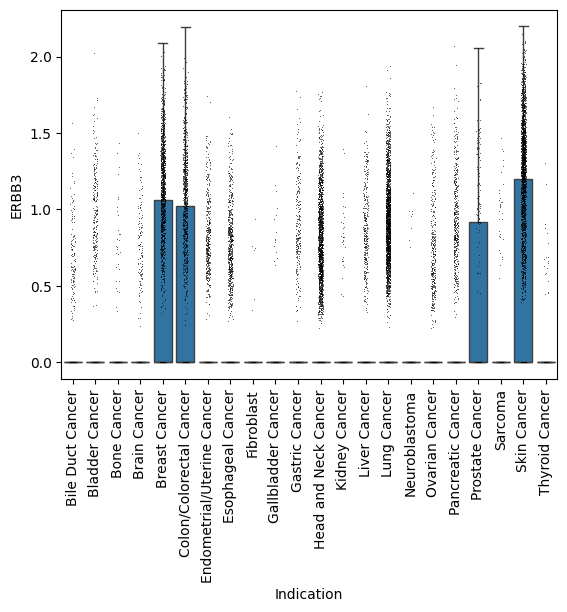

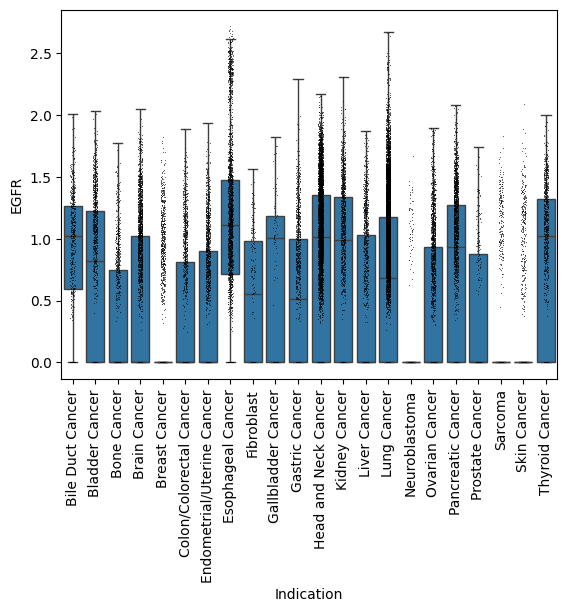

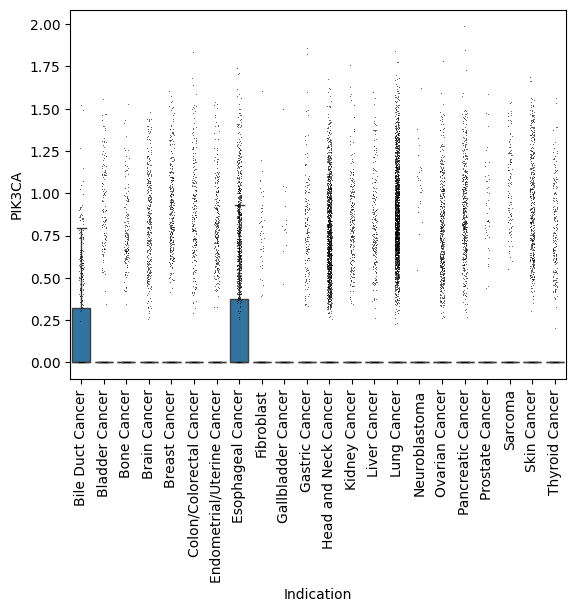

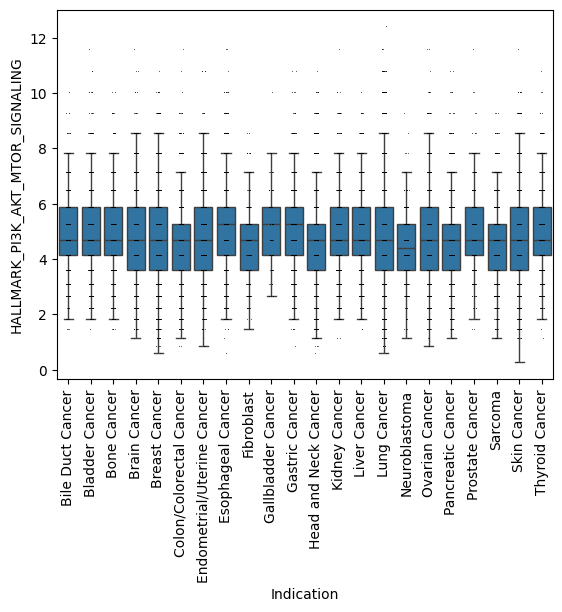

In [14]:
for col in df.columns:
  if col != "Indication":
    x = sns.boxplot(
      data=df,
      x='Indication',
      y=col,
      showfliers=False,
      #ax=axs[i]
      )

    x = sns.stripplot(
      data=df,
      x='Indication',
      y=col,
      color='black',
      size=0.5,
      jitter=True,
      #ax=axs[i]
      )
    x.tick_params(axis='x', labelrotation=90)
    plt.show()


All cancer types show activation for this pathway. Therefore we can go with our previous results: HER2 positive colorectal cancer, esophageal cancer, and bile duct cancer, and HER2/HER3 positive endometrial cancer can be good candidates for Trastuzumab repurposing.